In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import style

In [54]:
df = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [55]:
df = df[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']]

predict = 'G3'

X = np.array(df.drop([predict], axis=1))

y = np.array(df[predict])

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [57]:
# Passo 1:

linear = LinearRegression()

# Passo 2:
linear.fit(x_train, y_train)

acc = linear.score(x_test, y_test)

predictions = linear.predict(x_test)

print(f'{acc*100: .2f}%')

 72.43%


In [58]:
print(f'Coeficiente: {linear.coef_}')
print(f'Intercept: {linear.intercept_}')
print(f'MSE: {mean_squared_error(y_test, predictions)}')

Coeficiente: [ 0.14504563  0.97634785 -0.19582687 -0.28519147  0.03838979]
Intercept: -1.3075092467046154
MSE: 4.641337093546244


In [59]:
_d = {'Predictions': predictions, 'RealValues': y_test, 'Input':x_test.tolist()}
result_df = pd.DataFrame(_d)
result_df.loc[result_df.Predictions < 0.00,'Predictions'] = 0
print(result_df)

    Predictions  RealValues               Input
0      8.401892          10     [8, 9, 2, 0, 4]
1      7.348764           8     [8, 8, 2, 0, 2]
2      7.336179           8     [8, 8, 1, 1, 4]
3      8.611326           9    [10, 9, 3, 0, 7]
4     14.439994          15   [13, 15, 4, 0, 0]
5     14.635821          15   [13, 15, 3, 0, 0]
6      9.855644          10   [11, 10, 1, 0, 0]
7      6.005546           0     [6, 7, 2, 0, 0]
8      7.131839           0     [9, 8, 2, 1, 0]
9      5.733768           9     [7, 7, 2, 2, 4]
10    14.272952          14   [14, 14, 1, 0, 2]
11     9.455019          10    [8, 10, 2, 0, 6]
12    13.906081          15   [12, 14, 1, 0, 0]
13    10.831992          10   [11, 11, 1, 0, 0]
14    11.885120          11   [11, 12, 1, 0, 2]
15     8.090702           8     [7, 9, 1, 1, 2]
16     9.327458          10    [9, 10, 3, 0, 4]
17    10.712945          10   [11, 11, 2, 0, 2]
18     7.473152           7     [5, 9, 2, 2, 6]
19     8.121142           8    [6, 9, 1,

In [60]:
a = [[18, 19, 1, 0, 6], [13, 20, 0, 0, 6], [10, 5, 0, 0, 0]]
linear.predict(a)

array([19.88843305, 20.33537963,  5.02468628])

In [61]:
with open('studentmodel.pickle', 'wb') as f:
    pickle.dump(linear, f)

pickle_in = open('studentmodel.pickle', 'rb')
linear = pickle.load(pickle_in)

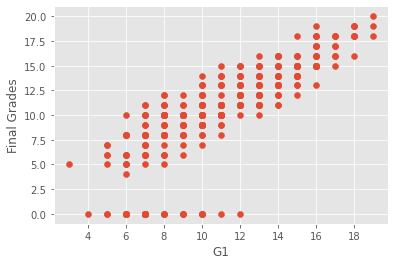

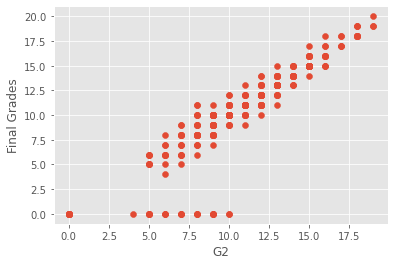

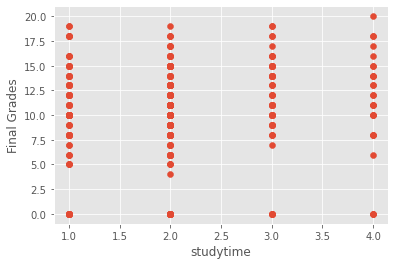

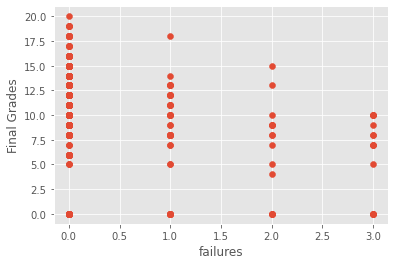

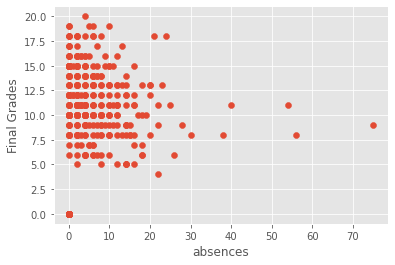

In [64]:
style.use('ggplot')
for p in df.columns:
    if p == 'G3':
        continue

    plt.scatter(df[p], df['G3'])
    plt.xlabel(p)
    plt.ylabel('Final Grades')
    plt.show()